SHORT STRADDLE


Write one call and Write one put of same expiration dates and same exercise price.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Generate spot price range

In [3]:
strike_price = int(input("Enter strike price: "))
spot1 = int(input("Enter the first spot price: "))
spot_last = int(input("Enter the last spot price: "))
spot_diff = int(input("Enter the difference between spot prices: "))

spot_prices = np.arange(spot1,spot_last,spot_diff)
if spot_prices[-1] != spot_last:
    spot_prices = list(np.append(spot_prices, spot_last))


In [4]:
spot_prices

[140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]

Accept Premiums of Call & Put

In [5]:
prem_rec_short_call = int(input('Enter Premium Received for Shorted Call: '))
premium_short_call = [prem_rec_short_call] * len(spot_prices)

prem_rec_short_put = int(input('Enter Premium Received for Shorted Put: '))
premium_short_put = [prem_rec_short_put] * len(spot_prices)

Calculating Intrinsic Values

In [6]:
iv_call = []
payoff_short_call = []
payoff_short_put = []
net_payoff = []

In [7]:
for i in (spot_prices):
    
    if (strike_price>=i) :
        iv_call.append(0)

    elif (strike_price < i):
        temp = 0.0
        temp = strike_price - i
        iv_call.append(temp)

In [8]:
iv_call

[0, 0, 0, 0, 0, 0, 0, -5, -10, -15, -20, -25, -30]

In [9]:
iv_put =[]

In [10]:
for i in (spot_prices):
    if (strike_price>i) :
        temp = 0.0
        temp = i - strike_price
        iv_put.append(temp)

    elif (strike_price <= i):
        iv_put.append(0)

In [11]:
iv_put

[-30, -25, -20, -15, -10, -5, 0, 0, 0, 0, 0, 0, 0]

Calculating Payoff for call and put

In [13]:
for i in range (len(spot_prices)):
    pnl = iv_call[i] + premium_short_call[i]
    payoff_short_call.append(pnl)
payoff_short_call

[15, 15, 15, 15, 15, 15, 15, 10, 5, 0, -5, -10, -15]

In [12]:
for i in range (len(spot_prices)):
    pnl = iv_put[i] + premium_short_put[i]
    payoff_short_put.append(pnl)
payoff_short_put

[-27, -22, -17, -12, -7, -2, 3, 3, 3, 3, 3, 3, 3]

Calculation for Net Payoff

In [14]:
for i in range (len(spot_prices)):
    pnl = payoff_short_call[i] + payoff_short_put[i]
    net_payoff.append(pnl)
net_payoff

[-12, -7, -2, 3, 8, 13, 18, 13, 8, 3, -2, -7, -12]

FINAL ANSWER

In [23]:
bep_call = strike_price + prem_rec_short_call
bep_put = strike_price - prem_rec_short_put

print(f"Break-Even Price for Shorted Call = {bep_call}")
print(f"Break-Even Price for Shorted Put = {bep_put}")

Break-Even Price for Shorted Call = 185
Break-Even Price for Shorted Put = 167


In [15]:
short_call_option_data = {'Spot Prices': spot_prices, 'Short Call IV': iv_call, 'Premium Paid (Call)':premium_short_call, 'P/L (Call)':payoff_short_call}
short_call_option_data = pd.DataFrame(short_call_option_data)

short_put_option_data = {'Spot Prices': spot_prices, 'Short Put IV': iv_put, 'Premium Recieved (Put)':premium_short_put, 'P/L (Put)':payoff_short_put}
short_put_option_data = pd.DataFrame(short_put_option_data)

In [16]:
print("\n\t\t\tShort Call Option Data\n")
print(short_call_option_data)


			Short Call Option Data

    Spot Prices  Short Call IV  Premium Paid (Call)  P/L (Call)
0           140              0                       15          15
1           145              0                       15          15
2           150              0                       15          15
3           155              0                       15          15
4           160              0                       15          15
5           165              0                       15          15
6           170              0                       15          15
7           175             -5                       15          10
8           180            -10                       15           5
9           185            -15                       15           0
10          190            -20                       15          -5
11          195            -25                       15         -10
12          200            -30                       15         -15


In [17]:
print("\n\t\t\tShort Put Option Data\n")
print(short_put_option_data)


			Short Put Option Data

    Spot Prices  Short Put IV  Premium Recieved (Put)  P/L (Put)
0           140           -30                       3        -27
1           145           -25                       3        -22
2           150           -20                       3        -17
3           155           -15                       3        -12
4           160           -10                       3         -7
5           165            -5                       3         -2
6           170             0                       3          3
7           175             0                       3          3
8           180             0                       3          3
9           185             0                       3          3
10          190             0                       3          3
11          195             0                       3          3
12          200             0                       3          3


In [20]:
net = {'Strategy P/L': net_payoff}
net = pd.DataFrame(net)
print("\n\t\t\tNet Pay-off Of Strategy\n")
print(net)


			Net Pay-off Of Strategy

    Strategy P/L
0            -12
1             -7
2             -2
3              3
4              8
5             13
6             18
7             13
8              8
9              3
10            -2
11            -7
12           -12


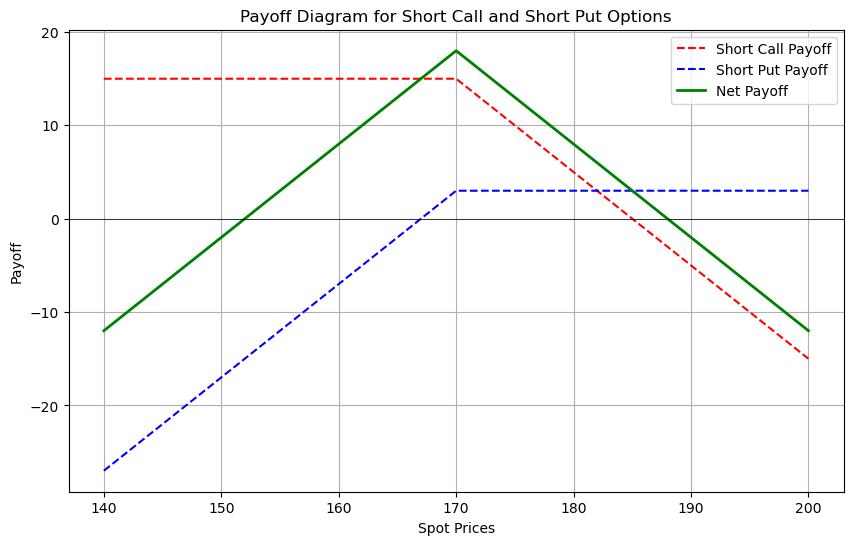

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(spot_prices, payoff_short_call, label='Short Call Payoff', color='red', linestyle='--')
plt.plot(spot_prices, payoff_short_put, label='Short Put Payoff', color='blue', linestyle='--')
plt.plot(spot_prices, net_payoff, label='Net Payoff', color='green', linewidth=2)
plt.title('Payoff Diagram for Short Call and Short Put Options')
plt.xlabel('Spot Prices')
plt.ylabel('Payoff')
plt.axhline(0, color='black', lw=0.5, ls='-')  
plt.grid(True)
plt.legend()
plt.show()